In [6]:
from time import time
from factory_theory.primitives import SOL, Not, Point2D, \
                                      IntVal, Inserter, dir_to_disp, \
                                      Rectangle, non_intersecting_rectangles, AssemblyMachine, connection
                        

In [7]:
import plotting as P
import matplotlib.pyplot as plt

# Manual construction

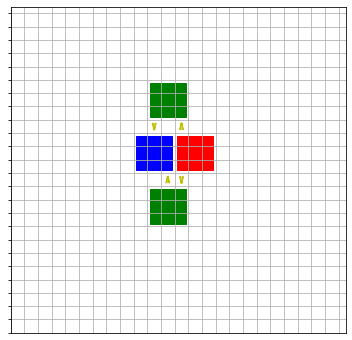

In [9]:
SOL.fresh_solver()

m1 = AssemblyMachine()
m2_1 = AssemblyMachine()
m2_2 = AssemblyMachine()
m3 = AssemblyMachine()

ins1 = Inserter()
ins2 = Inserter()
ins3 = Inserter()
ins4 = Inserter()

SOL.add(connection(m1, ins1, m2_1))
SOL.add(connection(m1, ins2, m2_2))
SOL.add(connection(m2_1, ins3, m3))
SOL.add(connection(m2_2, ins4, m3))

SOL.add(non_intersecting_rectangles(m1,m2_1,m2_2,m3))

SOL.model()


plt.figure(figsize=(6,6))

for ins in [ins1, ins2, ins3, ins4]:
    P.plot_inserter(ins)
    
P.plot_rectangle(m1, color='r')
P.plot_rectangle(m2_1, color='g')
P.plot_rectangle(m2_2, color='g')
P.plot_rectangle(m3, color='b')

P.plot_grid(Point2D(-10,-10), Point2D(10,10))

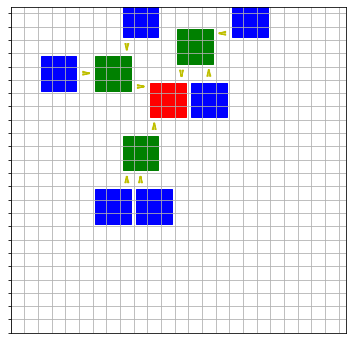

In [4]:
SOL.fresh_solver()

inserters = []
machines = []

def new_machine(color):
    m = AssemblyMachine()
    m.color = color
    machines.append(m)
    return m

def new_inserter():
    ins = Inserter()
    inserters.append(ins)
    return ins

r = 'r'
g = 'g'
b = 'b'

m1_1 = new_machine(b)
m1_2 = new_machine(b)

m1_3 = new_machine(b)
m1_4 = new_machine(b)

m1_5 = new_machine(b)
m1_6 = new_machine(b)

m2_1 = new_machine(g)
m2_2 = new_machine(g)
m2_3 = new_machine(g)

m3 = new_machine(r)

SOL.add(connection(m1_1, new_inserter(), m2_1))
SOL.add(connection(m1_2, new_inserter(), m2_1))

SOL.add(connection(m1_3, new_inserter(), m2_2))
SOL.add(connection(m1_4, new_inserter(), m2_2))

SOL.add(connection(m1_5, new_inserter(), m2_3))
SOL.add(connection(m1_6, new_inserter(), m2_3))

SOL.add(connection(m2_1, new_inserter(), m3))
SOL.add(connection(m2_2, new_inserter(), m3))
SOL.add(connection(m2_3, new_inserter(), m3))

SOL.add(non_intersecting_rectangles(machines))

SOL.model()


plt.figure(figsize=(6,6))

for ins in inserters:
    P.plot_inserter(ins)

for m in machines:
    P.plot_rectangle(m, color=m.color)


P.plot_grid(Point2D(-10,-10), Point2D(10,10))

# Using Factory Object

In [5]:
from factory_theory import Factory
from plotting import plot_factory
from time import time

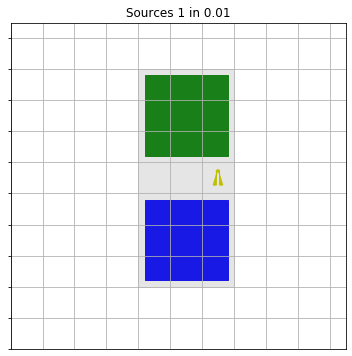

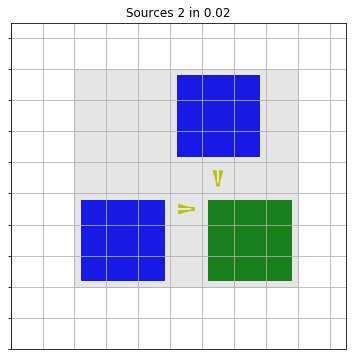

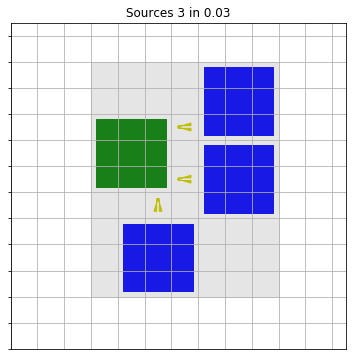

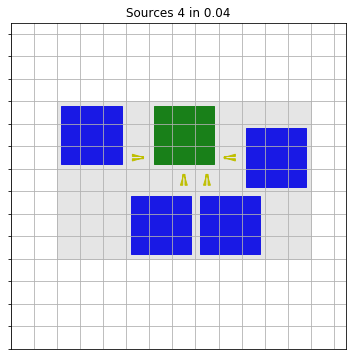

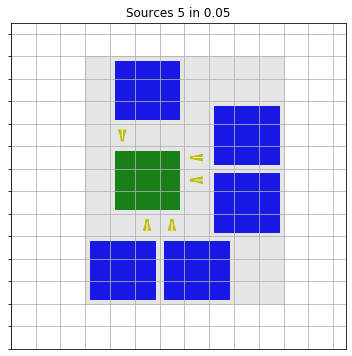

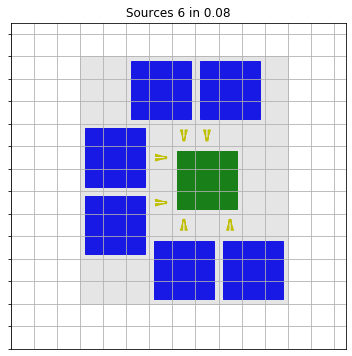

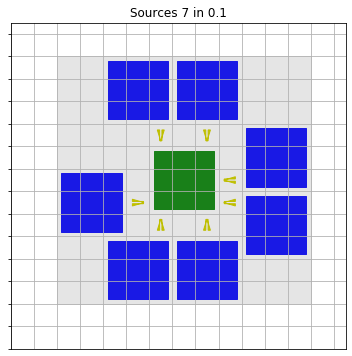

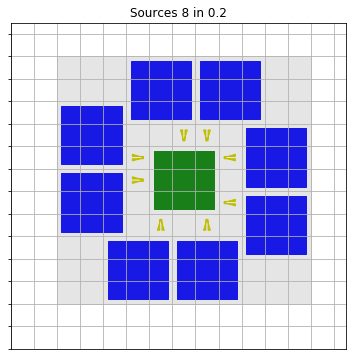

In [6]:
for n in range(1,100):
    f = Factory()
    sources = [f.new_machine('b') for _ in range(n)]
    sink = m1 = f.new_machine('g')
    for s in sources:
        f.connect_with_inserter(s, sink)
    
    t0 = time()
    if not f.finalize_and_model():
        break
    dt = time() - t0

    plot_factory(f, title=f'Sources {n} in {dt:.1}', size=(6,6), show=True)

# Two-stage processing

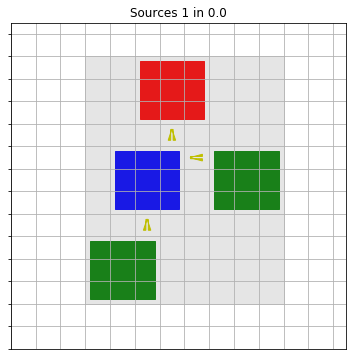

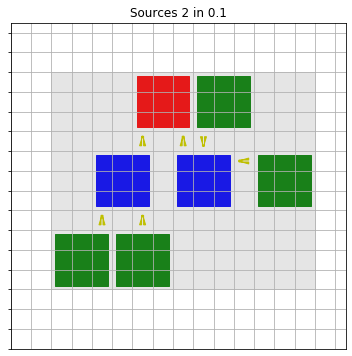

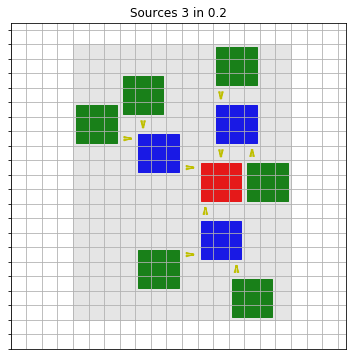

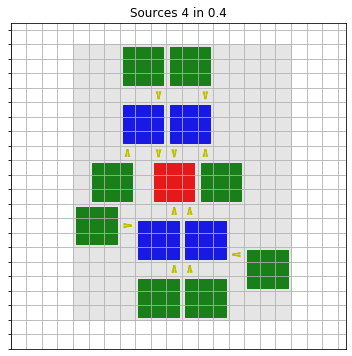

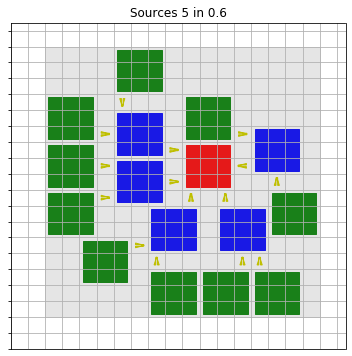

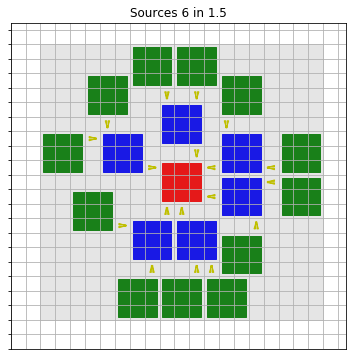

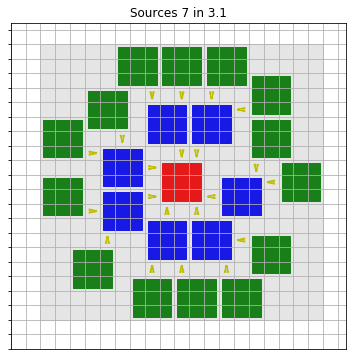

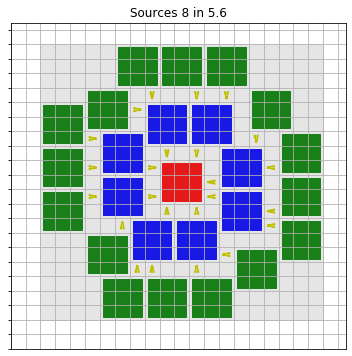

In [7]:
K = 2
times = []
for n in range(1,100):
    f = Factory()
    sources = [f.new_machine('b') for _ in range(n)]
    sink = m1 = f.new_machine('r')
    for s in sources:
        for k in range(K):
            m = f.new_machine('g')
            f.connect_with_inserter(m, s)
        f.connect_with_inserter(s, sink)
    
    t0 = time()
    if not f.finalize_and_model():
        break
    dt = time() - t0
    times.append(dt)

    plot_factory(f, title=f'Sources {n} in {dt:.1f}', size=(6,6), show=True)

In [8]:
import matplotlib.pyplot as plt

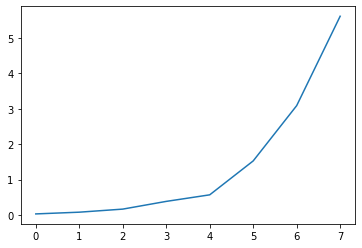

In [9]:
plt.plot(times)

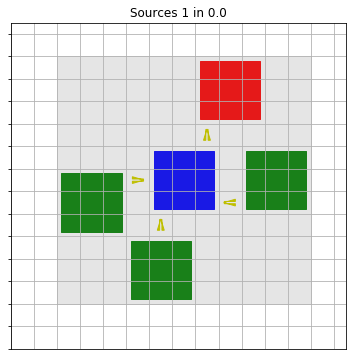

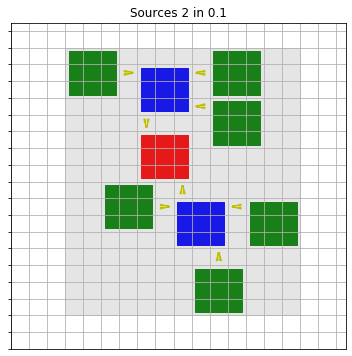

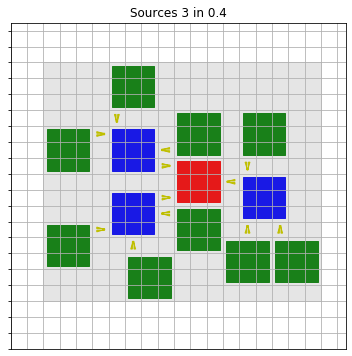

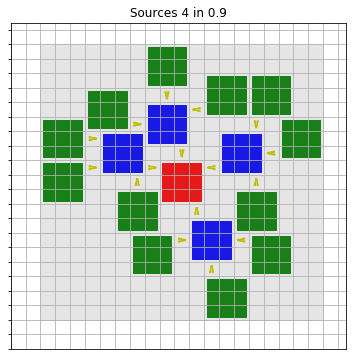

In [10]:
K = 3
times = []
for n in range(1,5):
    f = Factory()
    sources = [f.new_machine('b') for _ in range(n)]
    sink = m1 = f.new_machine('r')
    for s in sources:
        for k in range(K):
            m = f.new_machine('g')
            f.connect_with_inserter(m, s)
        f.connect_with_inserter(s, sink)
    
    t0 = time()
    if not f.finalize_and_model():
        break
    dt = time() - t0
    times.append(dt)

    plot_factory(f, title=f'Sources {n} in {dt:.1f}', size=(6,6), show=True)

# Connecting using belts

In [11]:
from factory_theory import Factory
from plotting import plot_factory

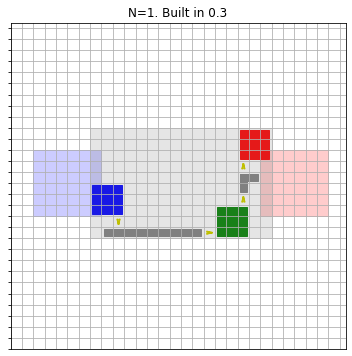

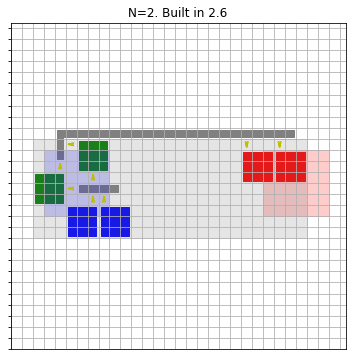

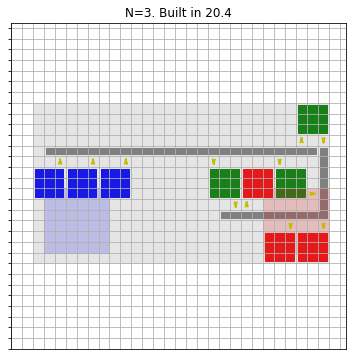

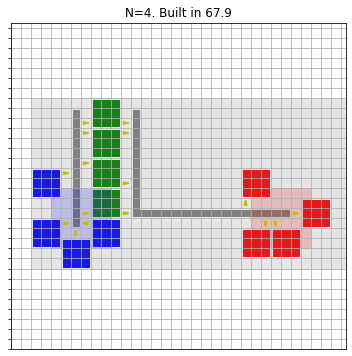

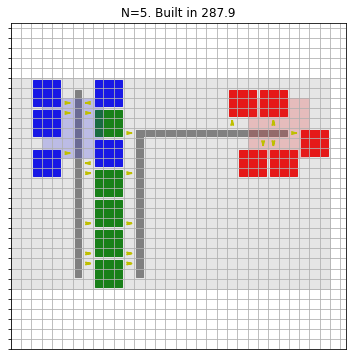

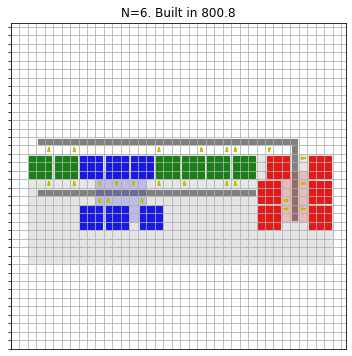

Negative solution for N=7, t=1563.1116116046906


In [16]:
times = []
MAX_SEGS=1
S = 5
for N in range(1, 10):
    f = Factory()
    prods = [f.new_machine('b') for _ in range(N)]
    cons = [f.new_machine('g') for _ in range(N)]
    fins = [f.new_machine('r') for _ in range(N)]
    sbelt = f.new_segmented_belt()
    sbelt2 = f.new_segmented_belt()
    
    prod_area = f.new_area((0,0),   (0+S, 0+S), color='blue', opacity=0.2)
    #cons_area = f.new_area((10,0),  (10+S,0+S), color='green', opacity=0.2)
    finish_area = f.new_area((20,0),(20+S,0+S), color='red', opacity=0.2)
    
    f.add(sbelt.num_segs <= MAX_SEGS)
    f.add(sbelt2.num_segs <= MAX_SEGS+1)

    for p in prods:
        f.connect_with_inserter(p, sbelt)
        f.add(prod_area.intersecting(p))

    for c in cons:
        f.connect_with_inserter(sbelt, c)
        f.connect_with_inserter(c, sbelt2)
        #f.add(cons_area.intersecting(c))
        
    for c in fins:
        f.connect_with_inserter(sbelt2, c)
        f.add(finish_area.intersecting(c))

    m = f.finalize_and_model()
    times.append(f.elapsed_time)
    if m is None:
        print(f'Negative solution for N={N}, t={f.elapsed_time}')
        break

    plot_factory(f, title=f'N={N}. Built in {f.elapsed_time:.1f}', size=(6,6), show=True)


In [18]:
from factory_theory import Factory
from plotting import plot_factory
from time import time

import factory_theory.primitives as P

LBU 0 None None
R=1; T=1.285
V= 27
LBU 0 13 27
R=-1; T=0.187
LBU 14 20 27
R=1; T=2.132
V= 20
LBU 14 17 20
R=-1; T=15.599
LBU 18 19 20
R=1; T=7.260
V= 19
LBU 18 18 19
R=1; T=4.807
V= 18


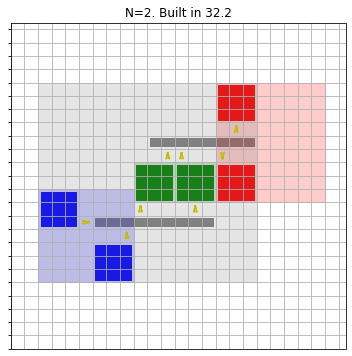

In [19]:
times = []
MAX_SEGS=1
N = 2
f = Factory()
prods1 = [f.new_machine('b') for _ in range(N)]
prods2 = [f.new_machine('g') for _ in range(N)]
prods3 = [f.new_machine('r') for _ in range(N)]
sbelt12 = f.new_segmented_belt()
sbelt23 = f.new_segmented_belt()

metric = P.IntVal()

f.add(metric.v == f.area.size.x + f.area.size.y)

prod1_area = f.new_area(None, None, color='blue', opacity=0.2)
prod2_area = f.new_area(None, None, color='green', opacity=0.2)
prod3_area = f.new_area(None, None, color='red', opacity=0.2)

for a1, a2 in f._forall_commutative_pairs([prod1_area,prod2_area,prod3_area]):
    f.add(a1.non_intersecting(a2))


f.add(sbelt12.num_segs <= MAX_SEGS)
f.add(sbelt23.num_segs <= MAX_SEGS)

for p1 in prods1:
    f.connect_with_inserter(p1, sbelt12)
    f.add(p1.inside(prod1_area))

for p2 in prods2:
    f.connect_with_inserter(sbelt12, p2)
    f.connect_with_inserter(p2, sbelt23)
    f.add(p2.inside(prod2_area))

for p3 in prods3:
    f.connect_with_inserter(sbelt23, p3)
    f.add(p3.inside(prod3_area))

model, metric = f.finalize_and_model(minimize_metric=metric)

times.append(f.elapsed_time)
if model is None:
    print(f'Negative solution for N={N}, t={f.elapsed_time:.1f}')
else:
    plot_factory(f, title=f'N={N}. Built in {f.elapsed_time:.1f}', size=(6,6), show=True)